In [0]:
# This cell will prompt you to connect this notebook with your google account.
from google.colab import drive                                                                        
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Docencia/art_JDPJ/en_proceso/energy_metrovalencia/Datos_v2/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Setup

In [0]:
# Basics
import scipy
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import randint, uniform
from scipy.io import loadmat
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from tqdm import tqdm
import pickle

# Machine Learning models
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Preprocessing, metrics, evaluation and others
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RepeatedKFold, GridSearchCV, StratifiedKFold, validation_curve, learning_curve, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#ignore log(0) and divide by 0 warning
np.seterr(divide = 'ignore');
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

print('Libraries read')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Libraries read


# Reading the dataset

## Transforming -mat files to csv files

# Line 1

file = loadmat('Linea1_betera-villanueva/140723_120545_CMB_SE-VC.mat')
for i in file:
    if '__' not in i and 'readme' not in i:
        np.savetxt(("file1.csv"),file[i],delimiter=',')
        
file = loadmat('Linea1_betera-villanueva/140723_135031_CMB_VC-BE.mat')
for i in file:
    if '__' not in i and 'readme' not in i:
        np.savetxt(("file2.csv"),file[i],delimiter=',')

# Line 2

file = loadmat('Linea2_liria-torrent/140724_121207_CMB_TA-LL.mat')
for i in file:
    if '__' not in i and 'readme' not in i:
        np.savetxt(("file3.csv"),file[i],delimiter=',')
        
file = loadmat('Linea2_liria-torrent/140724_132801_CMB_LL-TA.mat')
for i in file:
    if '__' not in i and 'readme' not in i:
        np.savetxt(("file4.csv"),file[i],delimiter=',')
        
file = loadmat('Linea2_liria-torrent/140724_145208_CMB_TA-LL.mat')
for i in file:
    if '__' not in i and 'readme' not in i:
        np.savetxt(("file5.csv"),file[i],delimiter=',')

file = loadmat('Linea2_liria-torrent/140724_160805_CMB_LL-TA.mat')
for i in file:
    if '__' not in i and 'readme' not in i:
        np.savetxt(("file6.csv"),file[i],delimiter=',')

# Line 3       
        
file = loadmat('Linea3_rafelbunyol-aeroport/140801_110721_CMB_RA-AE.mat')
for i in file:
    if '__' not in i and 'readme' not in i:
        np.savetxt(("file7.csv"),file[i],delimiter=',')        
        
file = loadmat('Linea3_rafelbunyol-aeroport/140801_120750_CMB_AE-RA.mat')
for i in file:
    if '__' not in i and 'readme' not in i:
        np.savetxt(("file8.csv"),file[i],delimiter=',') 
        
file = loadmat('Linea3_rafelbunyol-aeroport/140801_130712_CMB_RA-AE.mat')
for i in file:
    if '__' not in i and 'readme' not in i:
        np.savetxt(("file9.csv"),file[i],delimiter=',') 
        
file = loadmat('Linea3_rafelbunyol-aeroport/140801_140806_CMB_AE-RA.mat')
for i in file:
    if '__' not in i and 'readme' not in i:
        np.savetxt(("file10.csv"),file[i],delimiter=',') 

# Line 5

file = loadmat('Linea5_maritim-aeroport/140804_125645_CMB_MM-AE.mat')
for i in file:
    if '__' not in i and 'readme' not in i:
        np.savetxt(("file11.csv"),file[i],delimiter=',') 
        
file = loadmat('Linea5_maritim-aeroport/140804_133612_CMB_AE-MM.mat')
for i in file:
    if '__' not in i and 'readme' not in i:
        np.savetxt(("file12.csv"),file[i],delimiter=',') 
        
file = loadmat('Linea5_maritim-aeroport/140804_141620_CMB_MM-AE.mat')
for i in file:
    if '__' not in i and 'readme' not in i:
        np.savetxt(("file13.csv"),file[i],delimiter=',') 
        
file = loadmat('Linea5_maritim-aeroport/140804_145709_CMB_AE-MM.mat')
for i in file:
    if '__' not in i and 'readme' not in i:
        np.savetxt(("file14.csv"),file[i],delimiter=',') 

## Reading all the files

## PART I. Database with only speed and acceleration

In [0]:
files = []
for i in range(1, 15):
    file = pd.read_csv(base_dir + 'file'+str(i)+'.csv', header=None)
    files.append(file)
    file['file']=i
    
    
    
df_speed_acc = pd.concat(files)
file = None
files = None

In [0]:
'''
Orden de las columnas:
%01_tiempo total
%02_horas
%03_minutos
%04_segundos
%05_tensión disyuntor (V)
%06_intensidad disyuntor (A)
%07_potencia consumida en el disyuntor (W)
%08_potencia generada en el disyuntor (w)
%09_tensión auxiliares (V)
%10_intensidad auxiliares (A)
%11_potencia consumida en los auxiliares (W)
%12_tensión resistencias (V)
%13_intensidad resistencias (A)
%14_potencia consumida resistencias (W)
%15_velocidad (km/h)
%16_aceleración (m/s2)
%17_distancia recorrida (m)
'''

# Naming columns
df_speed_acc.columns = ['time', 'hh', 'mm', 'ss', 'cb_voltage', 'cb_intensity',
                'pow_cons_cb', 'pow_gen_cb', 'aux_voltage', 'aux_intensity',
                'pow_cons_aux', 'res_voltage', 'res_intensity', 
                'pow_cons_res', 'speed', 'acceleration', 'distance_traveled', 'file']

df_speed_acc.sort_values('time', inplace = True)
print('Shape: ', df_speed_acc.shape)
df_speed_acc.head()

Shape:  (52322, 18)


,time,hh,mm,ss,cb_voltage,cb_intensity,pow_cons_cb,pow_gen_cb,aux_voltage,aux_intensity,pow_cons_aux,res_voltage,res_intensity,pow_cons_res,speed,acceleration,distance_traveled,file
0,39920.0,11.0,5.0,20.0,1715.598,28.535,49022.375,0.0,1715.445,1.602,2748.142890,0.763,-0.076,-0.057988,0.0,0.0,0.0,7
1,39921.0,11.0,5.0,21.0,1715.598,28.535,49022.375,0.0,1716.208,1.831,3142.376848,0.763,-0.076,0.000000,0.0,0.0,0.0,7
2,39922.0,11.0,5.0,22.0,1715.293,28.611,49206.637,0.0,1715.903,1.907,3272.227021,0.763,-0.076,0.000000,0.0,0.0,0.0,7
3,39923.0,11.0,5.0,23.0,1714.530,28.687,49284.945,0.0,1714.988,1.907,3270.482116,0.763,-0.076,0.000000,0.0,0.0,0.0,7
4,39924.0,11.0,5.0,24.0,1712.699,28.687,49233.715,0.0,1713.309,1.907,3267.280263,0.763,-0.076,0.000000,0.0,0.0,0.0,7


The variable to predict is the power_total [kW], so we will create this column using pow_cons_cb, pow_gen_cb, pow_cons_aux and pow_cons_res.
Moreover, we will use only speed, acceleration, slope and curveh as predictors, thus, we will remove the other features as well.

In [0]:
df = df_speed_acc.copy()


df['traction_power'] = (df['pow_cons_cb']+ df['pow_gen_cb'] -2*df['pow_cons_aux'] - 2*df['pow_cons_res'])/1000

df.drop(columns=['pow_cons_cb', 'pow_gen_cb', 'pow_cons_aux', 'pow_cons_res'], axis=1, inplace=True)
df.drop(['time', 'hh', 'mm', 'ss','distance_traveled', 'file'], axis=1, inplace=True)
df.drop(['cb_voltage', 'cb_intensity', 'aux_voltage', 'aux_intensity','res_voltage', 'res_intensity'], axis=1, inplace=True)

print('Shape of the df: ', df.shape)
df.head()

Shape of the df:  (52322, 3)


,speed,acceleration,traction_power
0,0.0,0.0,43.526205
1,0.0,0.0,42.737621
2,0.0,0.0,42.662183
3,0.0,0.0,42.743981
4,0.0,0.0,42.699154


In [0]:
# Saving the unified database with the traction_power feature

df.to_csv(base_dir + 'data_metrovalencia_speed_acc.csv')

In [0]:
df = pd.read_csv(base_dir + 'data_metrovalencia_speed_acc.csv').iloc[:,1:]
df.head()

,speed,acceleration,traction_power
0,0.0,0.0,43.526205
1,0.0,0.0,42.737621
2,0.0,0.0,42.662183
3,0.0,0.0,42.743981
4,0.0,0.0,42.699154


# Data Preprocessing

In [0]:
# Verifying if there are null values
df.isnull().sum()

speed             0
acceleration      0
traction_power    0
dtype: int64

In [0]:
# Types of each feature

df.dtypes

speed             float64
acceleration      float64
traction_power    float64
dtype: object

In [0]:
# Description of the features
df.describe().transpose

<bound method DataFrame.transpose of               speed  acceleration  traction_power
count  52322.000000  52322.000000    52322.000000
mean      30.781615     -0.000115      156.160109
std       25.759666      0.386804      504.359503
min        0.000000     -1.345094    -1615.383749
25%        0.000000     -0.175592      -20.068187
50%       29.212189      0.000000       10.571462
75%       50.528738      0.066741      209.848849
max       84.501155      1.095747     2055.647169>

### Cleaning, spliting and scaling the data

From the previous table, we can see there are several features with significant outliers, excepting for speed and acceleration. We can see this better though plotting boxplots for all features.

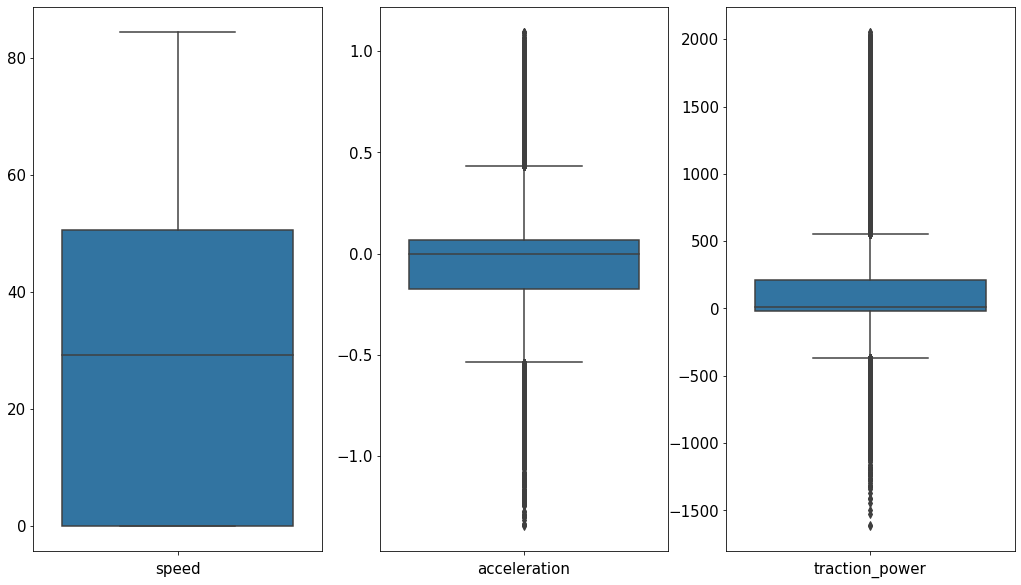

In [0]:
# Boxplots of all variables

fig = plt.figure(figsize=(30, 10))
for i, col in enumerate(df.columns):
    fig.add_subplot(1, 5, i+1)
    ax = sns.boxplot(x = df[col], orient='v')
    plt.xlabel(col, fontsize=15)
    plt.ylabel('')
    plt.tick_params(labelsize=15)

plt.show()

There are several outliers in all the features. However, due the nature of the data, we will not remove any outlier, rather we will perform a data scaling later.

### Correlations

Now, we will analyze some correlations between all independent variables and the dependent variable (target): traction_power

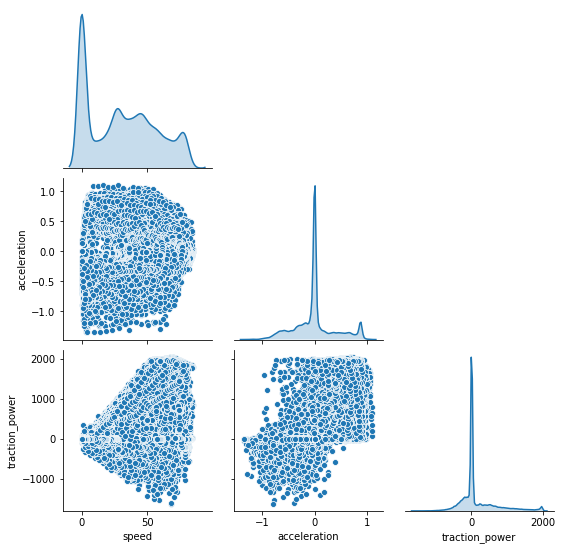

In [0]:
sns.pairplot(df, corner=True, diag_kind="kde")


From the above figure, we can't see any correlation between the five features.


#### Splitting the data

In [0]:
# Splitting data in X and Y
y = df['traction_power']
X = df.drop('traction_power',axis = 1)

(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

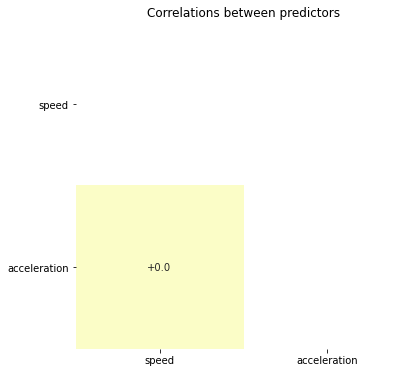

In [0]:
# Finding correlation between variables
plt.figure(figsize=(6,6))
Correlation = X.corr()

mask = np.zeros(Correlation.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

sns.heatmap(Correlation, cmap='RdYlBu', annot=True, fmt="+.1f", vmin = -1, vmax = 1, center = 0, cbar=False, mask=mask)

plt.title("Correlations between predictors")
plt.yticks(rotation=0)

There are no independent features with strong correlations. So we can use the four predictors for modelling the power traction.

#### Splitting data in training and test data

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=88)
print('Shape of X_train: ', X_train.shape, ' and y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape, ' and y_test: ', y_test.shape)

Shape of X_train:  (36625, 2)  and y_train:  (36625,)
Shape of X_test:  (15697, 2)  and y_test:  (15697,)


Now, we verify the training and test data follow similar distribution of the data.

In [0]:
# X_train
X_train.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
speed,36625.0,30.708778,25.760683,0.000000,0.000000,29.085743,50.377042,84.450556
acceleration,36625.0,-0.000173,0.386326,-1.345094,-0.175592,0.000000,0.066713,1.095747


In [0]:
# X_test
X_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
speed,15697.0,30.951560,25.757313,0.00000,0.000000,29.642126,50.870103,84.501155
acceleration,15697.0,0.000022,0.387929,-1.33808,-0.175592,0.000000,0.070248,1.092240


#### Scaling the data

Reasons behind performing normalization on input variables are:
1. Feature scaling improves convergence of steepest descent algorithms
2. Helps to avoid a situation when several variables dominate other variables in magnitude

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data

In [0]:
X_train_df = pd.DataFrame(X_train, columns=['speed', 'acceleration'])
X_train_df['df_type'] = 'X_train'
X_train_df.head()

,speed,acceleration,df_type
0,-1.192096,0.000448,X_train
1,1.875667,-0.026857,X_train
2,0.018959,-0.872292,X_train
3,0.601542,0.109522,X_train
4,-1.192096,0.000448,X_train


In [0]:
X_test_df = pd.DataFrame(X_test, columns=['speed', 'acceleration'])
X_test_df['df_type'] = 'X_test'
X_test_df.head()

,speed,acceleration,df_type
0,-0.169998,-0.045012,X_test
1,-1.192096,0.000448,X_test
2,0.628046,-1.072286,X_test
3,-0.063985,2.100455,X_test
4,0.303625,1.445865,X_test


[None, None]

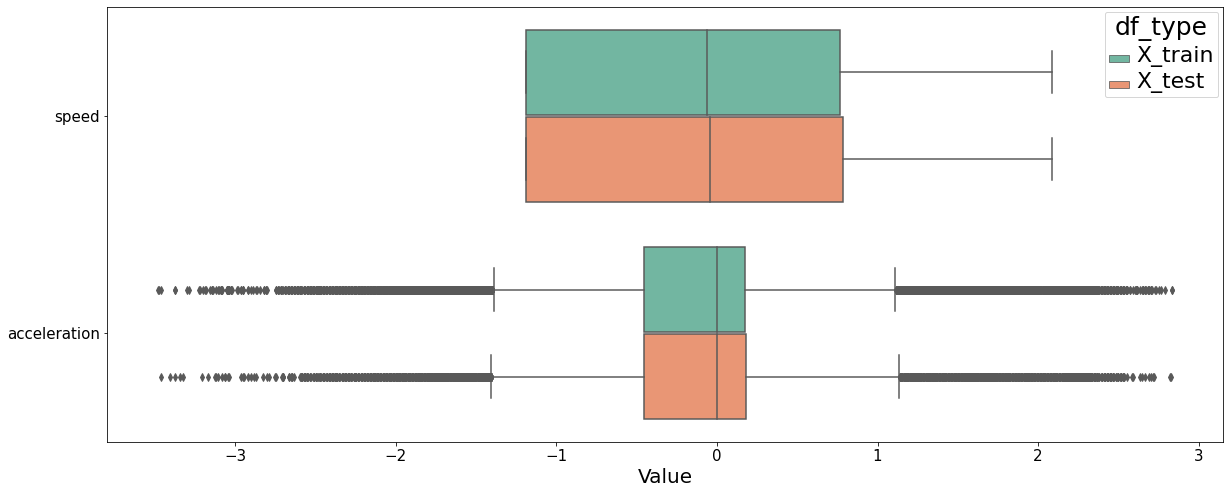

In [0]:
df3 = pd.concat([X_train_df, X_test_df], ignore_index=True)
df_long = pd.melt(df3, "df_type", var_name="", value_name="value")

plt.figure(figsize=(20,8))
ax = sns.boxplot(y="", hue="df_type", x="value", data=df_long, palette="Set2", orient='h')
plt.tick_params(labelsize=15)
plt.xlabel('Value', fontsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize='22')
plt.setp(ax.get_legend().get_title(), fontsize='25') 




As we can see, the distribution of both X_train and X_test are similar, so we can train the models using X_train and testing the models in X_test.

# Training the models

## Training different ML models

### Using speed and acceleration as predictors

LR: R2_cv_results_train_score: 0.49, R2_train_score: -0.03, R2_test_score: -0.05, MAE_test: 238.79, rMSE_test: 50.95
Ridge: R2_cv_results_train_score: 0.49, R2_train_score: -0.03, R2_test_score: -0.05, MAE_test: 238.79, rMSE_test: 50.95
DT: R2_cv_results_train_score: 0.73, R2_train_score: 0.74, R2_test_score: 0.64, MAE_test: 146.14, rMSE_test: 27.77
RF: R2_cv_results_train_score: 0.75, R2_train_score: 0.73, R2_test_score: 0.66, MAE_test: 137.65, rMSE_test: 25.46
GB: R2_cv_results_train_score: 0.75, R2_train_score: 0.67, R2_test_score: 0.65, MAE_test: 140.36, rMSE_test: 25.71
NN: R2_cv_results_train_score: 0.74, R2_train_score: 0.65, R2_test_score: 0.64, MAE_test: 144.63, rMSE_test: 26.36


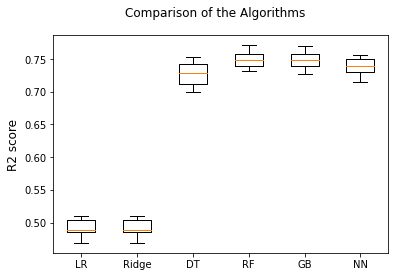

In [0]:
# Defining different models
models = []

models.append(('LR', LinearRegression()) )
models.append(('Ridge', Ridge()) )
models.append(('DT', DecisionTreeRegressor(min_samples_leaf=15)) )
models.append(('RF', RandomForestRegressor(min_samples_leaf=15)) )
models.append(('GB', GradientBoostingRegressor(min_samples_leaf=15)) )
models.append(('NN', MLPRegressor(early_stopping=True, max_iter=1000) ))


# Evaluating each model using as metrics: r2 and MAE because there are a lot of outliers in our dataset, for this reason we will no use MSE
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="r2")
    results.append(cv_results)
    names.append(name)
    model_result = model.fit(X_train,y_train)
    ypred_train = model_result.predict(X_train)
    ypred_test = model_result.predict(X_test)
    msg = "%s: R2_cv_results_train_score: %.2f, R2_train_score: %.2f, R2_test_score: %.2f, MAE_test: %.2f, rMSE_test: %.2f" % (
        name, cv_results.mean(), r2_score(ypred_train,y_train), r2_score(ypred_test,y_test), mean_absolute_error(ypred_test,y_test), 100*(mean_squared_error(ypred_test,y_test))/np.var(y_test)
    )
    print(msg)


# Comparing the models
fig = plt.figure()
fig.suptitle('Comparison of the Algorithms')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('R2 score', fontsize=12)
plt.show()

As we can see, the Random Forest model is the best in predicting the traction. However, Gradient Boosting, Decision Tree and Neural Network models have similar metrics than the achieved by the Random Forest model.

Thus, using the following features as predictors:

- speed
- acceleration

We achieve the following results for each ML model:


| Model                  | R2_train     | R2_test     | MAE_test   |  rMSE_test [%] |
|------------------------|--------------|-------------|------------|----------------|
| Linear Regression      | -0.03       | -0.05       | 238.79     |  50.95         |
| Ridge Regression       | -0.03       | -0.05       | 238.79     |  50.95         |
| Decision Tree          | 0.74        | 0.64        | 146.14     |  27.77         |
| **Random Forest**      | **0.73**    | **0.66**    | **137.65** |  **25.46**       |
| Gradient Boosting      | 0.67        | 0.65        | 140.36     |  25.71         |
| Neural Network         | 0.65        | 0.64        | 144.63     |  26.36         |

## PART II. Database with speed, acceleration, slope and curvature

In [0]:
files = []
for i in range(1, 15):
    file = pd.read_csv(base_dir + 'file'+str(i)+'_slope_curvature.csv', header=None)
    files.append(file)
    file['file']=i
    
    
    
df = pd.concat(files)
file = None
files = None

In [0]:
'''
Orden de las columnas:
%01_tiempo total
%02_horas
%03_minutos
%04_segundos
%05_tensión disyuntor (V)
%06_intensidad disyuntor (A)
%07_potencia consumida en el disyuntor (W)
%08_potencia generada en el disyuntor (w)
%09_tensión auxiliares (V)
%10_intensidad auxiliares (A)
%11_potencia consumida en los auxiliares (W)
%12_tensión resistencias (V)
%13_intensidad resistencias (A)
%14_potencia consumida resistencias (W)
%15_velocidad (km/h)
%16_aceleración (m/s2)
%17_distancia recorrida (m)
'''

# Naming columns
df.columns = ['time', 'hh', 'mm', 'ss', 'cb_voltage', 'cb_intensity',
                'pow_cons_cb', 'pow_gen_cb', 'aux_voltage', 'aux_intensity',
                'pow_cons_aux', 'res_voltage', 'res_intensity', 
                'pow_cons_res', 'speed', 'acceleration', 'distance_traveled', 'abs','slope','curvh','station','file']

df.sort_values('time', inplace = True)
print('Shape: ', df.shape)
df.head()

Shape:  (30529, 22)


,time,hh,mm,ss,cb_voltage,cb_intensity,pow_cons_cb,pow_gen_cb,aux_voltage,aux_intensity,pow_cons_aux,res_voltage,res_intensity,pow_cons_res,speed,acceleration,distance_traveled,abs,slope,curvh,station,file
0,40041,11,7,21,1699.728,40.437,68800.148,0.0,1700.339,15.870,26984.379930,0.763,0.000,0.0,0.000000,0.000000,0.000000,0.000000,-0.3,0.0,Rafelbunyol,7
1,40042,11,7,22,1698.813,40.284,68511.922,0.0,1699.271,15.870,26967.430770,0.763,-0.076,0.0,1.106306,0.307307,0.153654,0.153654,-0.3,0.0,NaN,7
2,40043,11,7,23,1687.368,68.972,116457.977,0.0,1687.521,20.447,34504.741887,0.763,-0.076,0.0,4.115371,0.835851,0.878887,0.878887,-0.3,0.0,NaN,7
3,40044,11,7,24,1669.362,119.404,199266.984,0.0,1669.362,19.532,32605.978584,0.763,-0.076,0.0,7.389954,0.909606,2.476849,2.476849,-0.3,0.0,NaN,7
4,40045,11,7,25,1644.795,198.676,326713.031,0.0,1644.795,17.777,29239.520715,0.916,0.000,0.0,10.588689,0.888537,4.973882,4.973882,-0.3,0.0,NaN,7


The variable to predict is the power_total [kW], so we will create this column using pow_cons_cb, pow_gen_cb, pow_cons_aux and pow_cons_res.
Moreover, we will use only speed, acceleration, slope and curveh as predictors, thus, we will remove the other features as well.

In [0]:
df['traction_power'] = (df['pow_cons_cb']+ df['pow_gen_cb'] -2*df['pow_cons_aux'] - 2*df['pow_cons_res'])/1000

df.drop(columns=['pow_cons_cb', 'pow_gen_cb', 'pow_cons_aux', 'pow_cons_res'], axis=1, inplace=True)
df.drop(['time', 'hh', 'mm', 'ss','distance_traveled', 'abs', 'station', 'file'], axis=1, inplace=True)
df.drop(['cb_voltage', 'cb_intensity', 'aux_voltage', 'aux_intensity','res_voltage', 'res_intensity'], axis=1, inplace=True)

print('Shape of the df: ', df.shape)
df.head()

Shape of the df:  (30529, 5)


,speed,acceleration,slope,curvh,traction_power
0,0.000000,0.000000,-0.3,0.0,14.831388
1,1.106306,0.307307,-0.3,0.0,14.577060
2,4.115371,0.835851,-0.3,0.0,47.448493
3,7.389954,0.909606,-0.3,0.0,134.055027
4,10.588689,0.888537,-0.3,0.0,268.233990


In [0]:
# Saving the unified database with the traction_power feature

df.to_csv(base_dir + 'data_metrovalencia.csv')

In [0]:
df = pd.read_csv(base_dir + 'data_metrovalencia.csv').iloc[:,1:]
df.head()

,speed,acceleration,slope,curvh,traction_power
0,0.000000,0.000000,-0.3,0.0,14.831388
1,1.106306,0.307307,-0.3,0.0,14.577060
2,4.115371,0.835851,-0.3,0.0,47.448493
3,7.389954,0.909606,-0.3,0.0,134.055027
4,10.588689,0.888537,-0.3,0.0,268.233990


# Data Preprocessing

In [0]:
# Verifying if there are null values
df.isnull().sum()

speed             0
acceleration      0
slope             0
curvh             0
traction_power    0
dtype: int64

In [0]:
# Types of each feature

df.dtypes

speed             float64
acceleration      float64
slope             float64
curvh             float64
traction_power    float64
dtype: object

In [0]:
# Description of the features
df.describe().transpose

<bound method DataFrame.transpose of               speed  acceleration         slope         curvh  traction_power
count  30529.000000  30529.000000  30529.000000  30529.000000    30529.000000
mean      27.395019     -0.000070     -0.057745    146.656291      150.487017
std       22.649968      0.418881      9.523848    427.512748      539.469291
min        0.000000     -1.345094    -26.000000      0.000000    -1615.383749
25%        0.000000     -0.214223     -1.900000      0.000000      -50.697095
50%       27.176621      0.000000      0.000000      0.000000        9.411998
75%       45.825470      0.045672      1.700000      0.000000      142.177144
max       77.635873      1.095747     26.000000   4760.240000     2021.908295>

### Cleaning, spliting and scaling the data

From the previous table, we can see there are several features with significant outliers, excepting for speed and acceleration. We can see this better though plotting boxplots for all features.

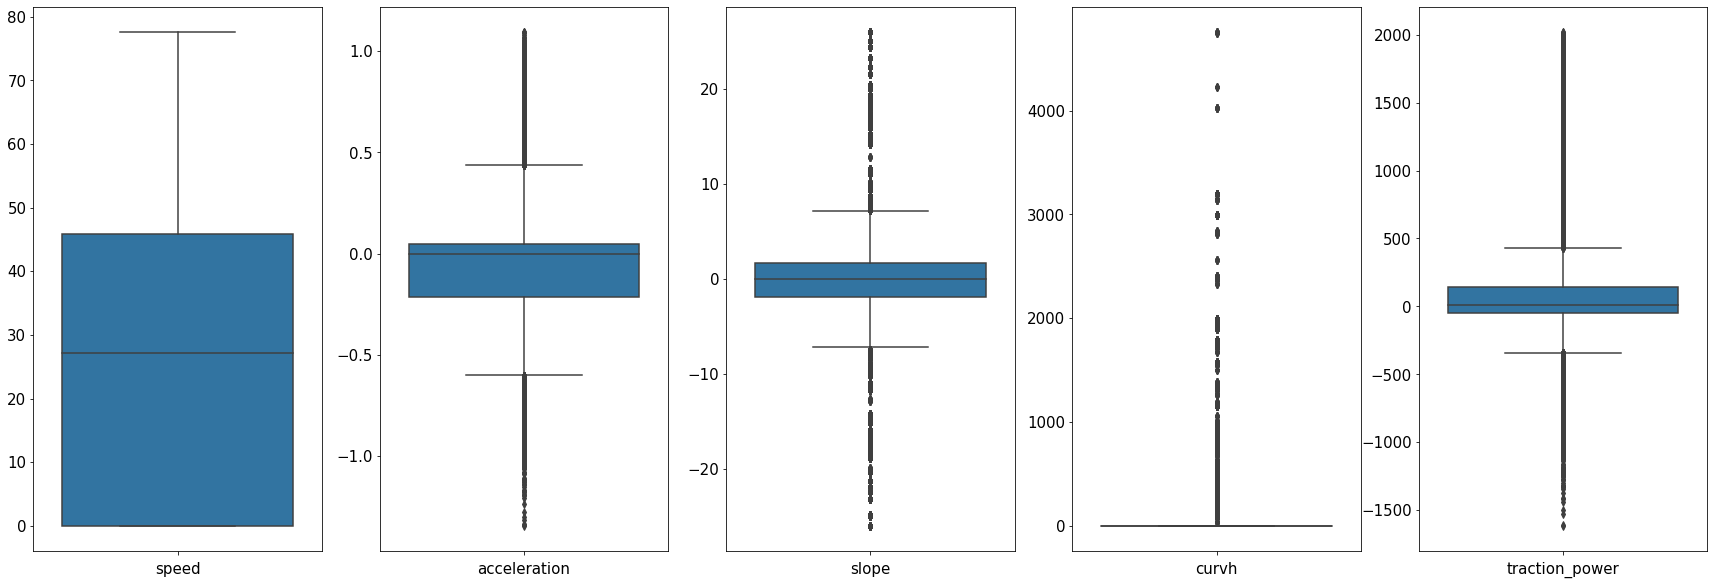

In [0]:
# Boxplots of all variables

fig = plt.figure(figsize=(30, 10))
for i, col in enumerate(df.columns):
    fig.add_subplot(1, 5, i+1)
    ax = sns.boxplot(x = df[col], orient='v')
    plt.xlabel(col, fontsize=15)
    plt.ylabel('')
    plt.tick_params(labelsize=15)

plt.show()

There are several outliers in all the features. However, due the nature of the data, we will not remove any outlier, rather we will perform a data scaling later.

### Correlations

Now, we will analyze some correlations between all independent variables and the dependent variable (target): traction_power

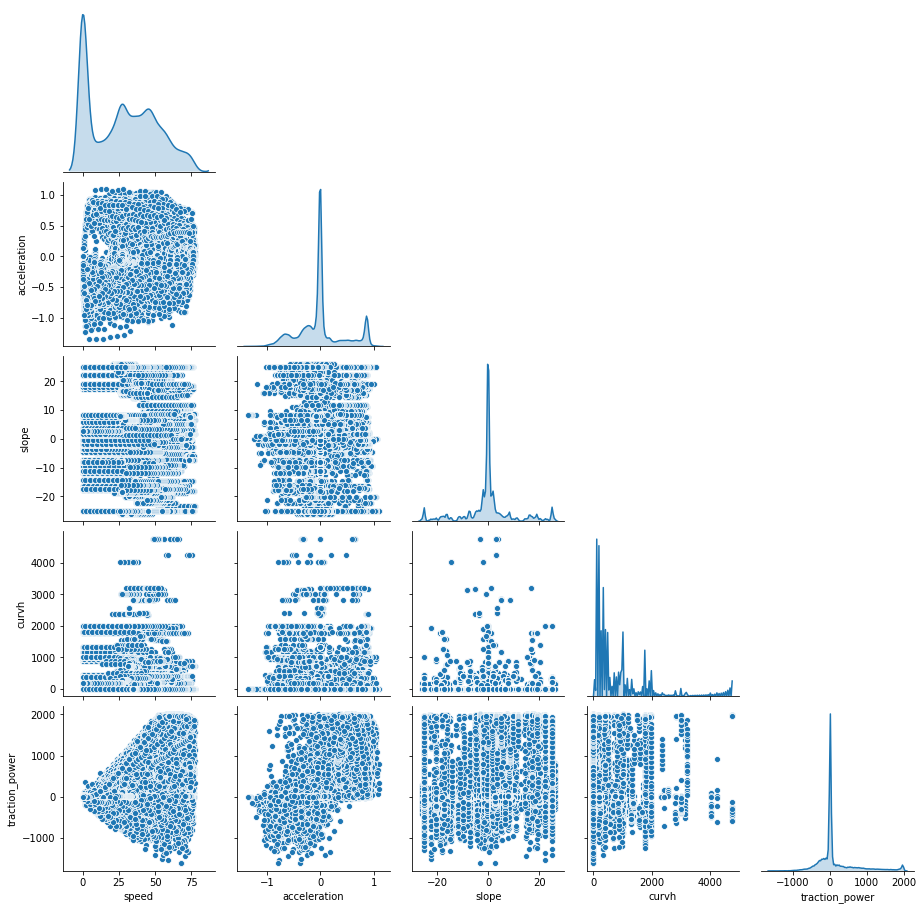

In [0]:
sns.pairplot(df, corner=True, diag_kind="kde")


From the above figure, we can't see any correlation between the five features.


## Models

## Using speed and acceleration as predictors

#### Splitting the data

In [0]:
# Splitting data in X and Y
y = df['traction_power']
X = df.drop(['traction_power', 'curvh', 'slope'],axis = 1)

(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

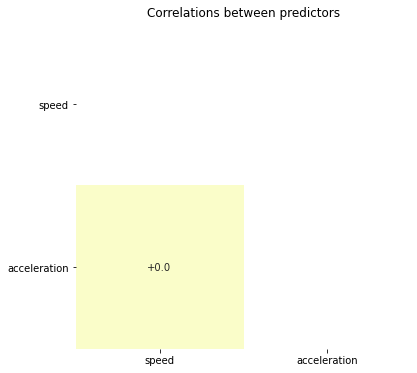

In [0]:
# Finding correlation between variables
plt.figure(figsize=(6,6))
Correlation = X.corr()

mask = np.zeros(Correlation.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

sns.heatmap(Correlation, cmap='RdYlBu', annot=True, fmt="+.1f", vmin = -1, vmax = 1, center = 0, cbar=False, mask=mask)

plt.title("Correlations between predictors")
plt.yticks(rotation=0)

There are no independent features with strong correlations. So we can use the four predictors for modelling the power traction.

#### Splitting data in training and test data

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=88)
print('Shape of X_train: ', X_train.shape, ' and y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape, ' and y_test: ', y_test.shape)

Shape of X_train:  (21370, 2)  and y_train:  (21370,)
Shape of X_test:  (9159, 2)  and y_test:  (9159,)


Now, we verify the training and test data follow similar distribution of the data.

In [0]:
# X_train
X_train.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
speed,21370.0,27.239655,22.635003,0.000000,0.000000,27.081836,45.623176,77.635873
acceleration,21370.0,-0.000925,0.419791,-1.345094,-0.215556,0.000000,0.045665,1.095747


In [0]:
# X_test
X_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
speed,9159.0,27.757519,22.681944,0.00000,0.000000,27.657058,46.198397,77.585275
acceleration,9159.0,0.001924,0.416767,-1.33808,-0.203703,0.000000,0.049151,1.095747


#### Scaling the data

Reasons behind performing normalization on input variables are:
1. Feature scaling improves convergence of steepest descent algorithms
2. Helps to avoid a situation when several variables dominate other variables in magnitude

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data

In [0]:
X_train_df = pd.DataFrame(X_train, columns=['speed', 'acceleration'])
X_train_df['df_type'] = 'X_train'
X_train_df.head()

,speed,acceleration,df_type
0,0.233497,-1.185784,X_train
1,1.469082,0.479042,X_train
2,-1.203459,0.002203,X_train
3,-0.115058,2.051973,X_train
4,-1.203459,0.002203,X_train


In [0]:
X_test_df = pd.DataFrame(X_test, columns=['speed', 'acceleration'])
X_test_df['df_type'] = 'X_test'
X_test_df.head()

,speed,acceleration,df_type
0,1.274698,0.002203,X_test
1,1.340611,-0.734007,X_test
2,-0.004458,-1.336420,X_test
3,-0.748492,-1.420092,X_test
4,-0.545725,-1.486991,X_test


[None, None]

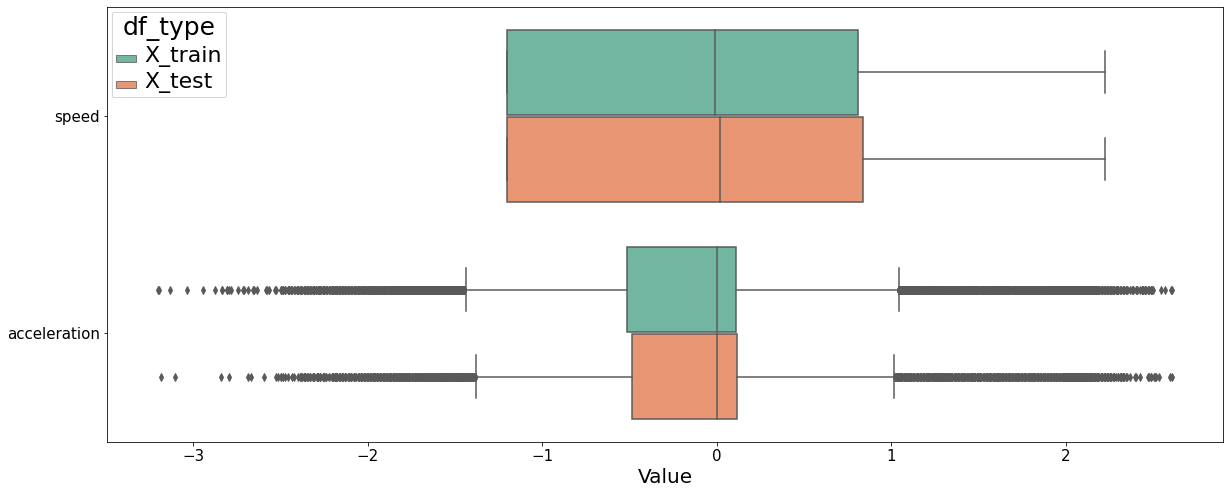

In [0]:
df3 = pd.concat([X_train_df, X_test_df], ignore_index=True)
df_long = pd.melt(df3, "df_type", var_name="", value_name="value")

plt.figure(figsize=(20,8))
ax = sns.boxplot(y="", hue="df_type", x="value", data=df_long, palette="Set2", orient='h')
plt.tick_params(labelsize=15)
plt.xlabel('Value', fontsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize='22')
plt.setp(ax.get_legend().get_title(), fontsize='25') 




### Training different ML models using speed and acceleration as predictors

LR: R2_cv_results_train_score: 0.48, R2_train_score: -0.07, R2_test_score: -0.11, MAE_test: 263.34, rMSE_test: 52.69
Ridge: R2_cv_results_train_score: 0.48, R2_train_score: -0.07, R2_test_score: -0.11, MAE_test: 263.34, rMSE_test: 52.69
DT: R2_cv_results_train_score: 0.72, R2_train_score: 0.74, R2_test_score: 0.62, MAE_test: 152.75, rMSE_test: 29.28
RF: R2_cv_results_train_score: 0.75, R2_train_score: 0.73, R2_test_score: 0.64, MAE_test: 144.21, rMSE_test: 27.00
GB: R2_cv_results_train_score: 0.74, R2_train_score: 0.67, R2_test_score: 0.61, MAE_test: 149.05, rMSE_test: 27.54
NN: R2_cv_results_train_score: 0.73, R2_train_score: 0.62, R2_test_score: 0.59, MAE_test: 160.23, rMSE_test: 28.97


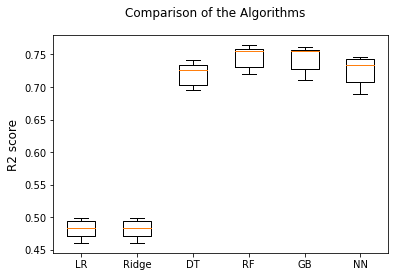

In [0]:
# Defining different models
models = []

models.append(('LR', LinearRegression()) )
models.append(('Ridge', Ridge()) )
models.append(('DT', DecisionTreeRegressor(min_samples_leaf=15)) )
models.append(('RF', RandomForestRegressor(min_samples_leaf=15)) )
models.append(('GB', GradientBoostingRegressor(min_samples_leaf=15)) )
models.append(('NN', MLPRegressor(early_stopping=True, max_iter=1000) ))


# Evaluating each model using as metrics: r2 and MAE because there are a lot of outliers in our dataset, for this reason we will no use MSE
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="r2")
    results.append(cv_results)
    names.append(name)
    model_result = model.fit(X_train,y_train)
    ypred_train = model_result.predict(X_train)
    ypred_test = model_result.predict(X_test)
    msg = "%s: R2_cv_results_train_score: %.2f, R2_train_score: %.2f, R2_test_score: %.2f, MAE_test: %.2f, rMSE_test: %.2f" % (
        name, cv_results.mean(), r2_score(ypred_train,y_train), r2_score(ypred_test,y_test), mean_absolute_error(ypred_test,y_test), 100*(mean_squared_error(ypred_test,y_test))/np.var(y_test)
    )
    print(msg)


# Comparing the models
fig = plt.figure()
fig.suptitle('Comparison of the Algorithms')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('R2 score', fontsize=12)
plt.show()

As we can see, the Random Forest model is the best in predicting the traction. However, Gradient Boosting, Decision Tree and Neural Network models have similar metrics than the achieved by the Random Forest model.

Thus, using the following features as predictors:

- speed
- acceleration

We achieve the following results for each ML model:


| Model                  | R2_train     | R2_test     | MAE_test   |  rMSE_test [%] |
|------------------------|--------------|-------------|------------|----------------|
| Linear Regression      | -0.07       | -0.11       | 263.34     |  52.69         |
| Ridge Regression       | -0.07       | -0.11       | 263.34     |  52.69         |
| Decision Tree          | 0.74        | 0.62        | 152.75     |  29.28         |
| **Random Forest**      | **0.73**    | **0.64**    | **144.21** |  **27.00**       |
| Gradient Boosting      | 0.67        | 0.61        | 149.05     |  27.54         |
| Neural Network         | 0.62        | 0.59        | 160.23     |  28.97         |

## Using speed, acceleration and slope as predictors

#### Splitting the data

In [0]:
# Splitting data in X and Y
y = df['traction_power']
X = df.drop(['traction_power', 'curvh'],axis = 1)

(array([0.5, 1.5, 2.5]), <a list of 3 Text major ticklabel objects>)

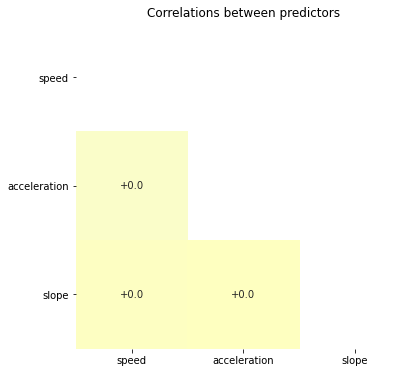

In [0]:
# Finding correlation between variables
plt.figure(figsize=(6,6))
Correlation = X.corr()

mask = np.zeros(Correlation.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

sns.heatmap(Correlation, cmap='RdYlBu', annot=True, fmt="+.1f", vmin = -1, vmax = 1, center = 0, cbar=False, mask=mask)

plt.title("Correlations between predictors")
plt.yticks(rotation=0)

There are no independent features with strong correlations. So we can use the four predictors for modelling the power traction.

#### Splitting data in training and test data

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=88)
print('Shape of X_train: ', X_train.shape, ' and y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape, ' and y_test: ', y_test.shape)

Shape of X_train:  (21370, 3)  and y_train:  (21370,)
Shape of X_test:  (9159, 3)  and y_test:  (9159,)


Now, we verify the training and test data follow similar distribution of the data.

In [0]:
# X_train
X_train.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
speed,21370.0,27.239655,22.635003,0.000000,0.000000,27.081836,45.623176,77.635873
acceleration,21370.0,-0.000925,0.419791,-1.345094,-0.215556,0.000000,0.045665,1.095747
slope,21370.0,-0.030941,9.506526,-26.000000,-1.900000,0.000000,1.700000,26.000000


In [0]:
# X_test
X_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
speed,9159.0,27.757519,22.681944,0.00000,0.000000,27.657058,46.198397,77.585275
acceleration,9159.0,0.001924,0.416767,-1.33808,-0.203703,0.000000,0.049151,1.095747
slope,9159.0,-0.120286,9.564370,-26.00000,-1.900000,0.000000,1.700000,26.000000


#### Scaling the data

Reasons behind performing normalization on input variables are:
1. Feature scaling improves convergence of steepest descent algorithms
2. Helps to avoid a situation when several variables dominate other variables in magnitude

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data

In [0]:
X_train_df = pd.DataFrame(X_train, columns=['speed', 'acceleration', 'slope'])
X_train_df['df_type'] = 'X_train'
X_train_df.head()

,speed,acceleration,slope,df_type
0,0.233497,-1.185784,0.350393,X_train
1,1.469082,0.479042,-0.343883,X_train
2,-1.203459,0.002203,0.003255,X_train
3,-0.115058,2.051973,-0.207132,X_train
4,-1.203459,0.002203,0.013774,X_train


In [0]:
X_test_df = pd.DataFrame(X_test, columns=['speed', 'acceleration', 'slope'])
X_test_df['df_type'] = 'X_test'
X_test_df.head()

,speed,acceleration,slope,df_type
0,1.274698,0.002203,0.329354,X_test
1,1.340611,-0.734007,2.349067,X_test
2,-0.004458,-1.336420,2.633089,X_test
3,-0.748492,-1.420092,0.003255,X_test
4,-0.545725,-1.486991,0.192603,X_test


[None, None]

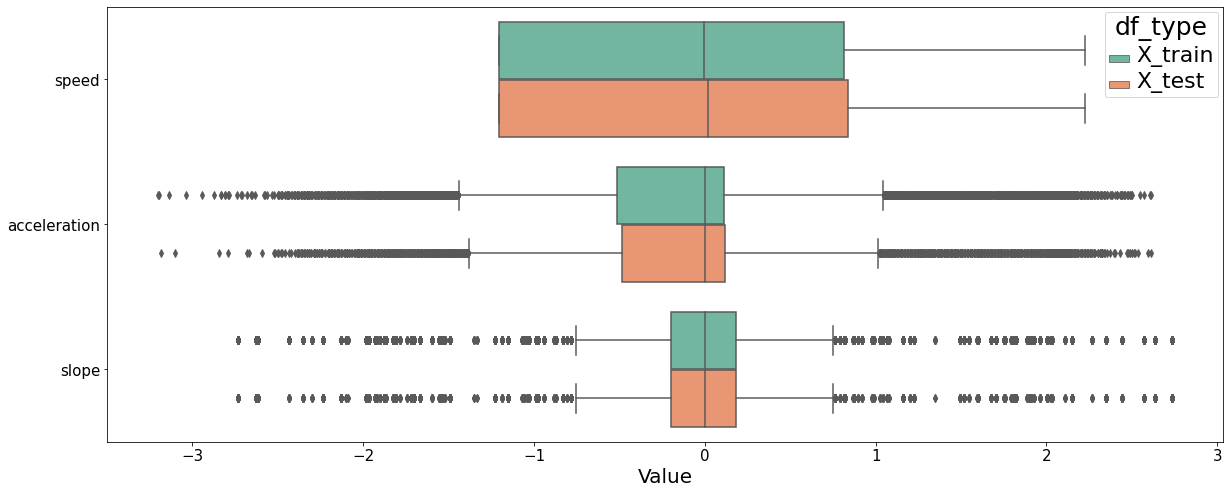

In [0]:
df3 = pd.concat([X_train_df, X_test_df], ignore_index=True)
df_long = pd.melt(df3, "df_type", var_name="", value_name="value")

plt.figure(figsize=(20,8))
ax = sns.boxplot(y="", hue="df_type", x="value", data=df_long, palette="Set2", orient='h')
plt.tick_params(labelsize=15)
plt.xlabel('Value', fontsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize='22')
plt.setp(ax.get_legend().get_title(), fontsize='25') 




### Training different ML models using speed, acceleration, and slope as predictors

LR: R2_cv_results_train_score: 0.51, R2_train_score: 0.03, R2_test_score: -0.01, MAE_test: 258.76, rMSE_test: 50.27
Ridge: R2_cv_results_train_score: 0.51, R2_train_score: 0.03, R2_test_score: -0.01, MAE_test: 258.76, rMSE_test: 50.27
DT: R2_cv_results_train_score: 0.76, R2_train_score: 0.79, R2_test_score: 0.68, MAE_test: 136.42, rMSE_test: 25.28
RF: R2_cv_results_train_score: 0.79, R2_train_score: 0.78, R2_test_score: 0.70, MAE_test: 126.72, rMSE_test: 22.78
GB: R2_cv_results_train_score: 0.77, R2_train_score: 0.71, R2_test_score: 0.66, MAE_test: 139.74, rMSE_test: 24.77
NN: R2_cv_results_train_score: 0.75, R2_train_score: 0.67, R2_test_score: 0.64, MAE_test: 146.05, rMSE_test: 26.09


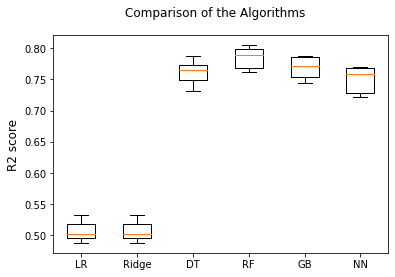

In [0]:
# Defining different models
models = []

models.append(('LR', LinearRegression()) )
models.append(('Ridge', Ridge()) )
models.append(('DT', DecisionTreeRegressor(min_samples_leaf=15)) )
models.append(('RF', RandomForestRegressor(min_samples_leaf=15)) )
models.append(('GB', GradientBoostingRegressor(min_samples_leaf=15)) )
models.append(('NN', MLPRegressor(early_stopping=True, max_iter=1000) ))


# Evaluating each model using as metrics: r2 and MAE because there are a lot of outliers in our dataset, for this reason we will no use MSE
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="r2")
    results.append(cv_results)
    names.append(name)
    model_result = model.fit(X_train,y_train)
    ypred_train = model_result.predict(X_train)
    ypred_test = model_result.predict(X_test)
    msg = "%s: R2_cv_results_train_score: %.2f, R2_train_score: %.2f, R2_test_score: %.2f, MAE_test: %.2f, rMSE_test: %.2f" % (
        name, cv_results.mean(), r2_score(ypred_train,y_train), r2_score(ypred_test,y_test), mean_absolute_error(ypred_test,y_test), 100*(mean_squared_error(ypred_test,y_test))/np.var(y_test)
    )
    print(msg)


# Comparing the models
fig = plt.figure()
fig.suptitle('Comparison of the Algorithms')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('R2 score', fontsize=12)
plt.show()

As we can see, the Random Forest model is the best in predicting the traction. However, Gradient Boosting, Decision Tree and Neural Network models have similar metrics than the achieved by the Random Forest model.

Thus, using the following features as predictors:

- speed
- acceleration
- slope

We achieve the following results for each ML model:


| Model                  | R2_train     | R2_test     | MAE_test   |  rMSE_test [%] |
|------------------------|--------------|-------------|------------|----------------|
| Linear Regression      | 0.03        | -0.01       | 258.76     |  50.27         |
| Ridge Regression       | 0.03        | -0.01       | 258.76     |  50.27         |
| Decision Tree          | 0.79        | 0.68        | 136.42     |  25.28         |
| **Random Forest**      | **0.78**    | **0.70**    | **126.72** |  **22.78**       |
| Gradient Boosting      | 0.71        | 0.66        | 139.74     |  24.77         |
| Neural Network         | 0.67        | 0.64        | 146.05     |  26.09         |

## Using speed, acceleration, slope and curvature as predictors

#### Splitting the data

In [0]:
# Splitting data in X and Y
y = df['traction_power']
X = df.drop('traction_power',axis = 1)

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

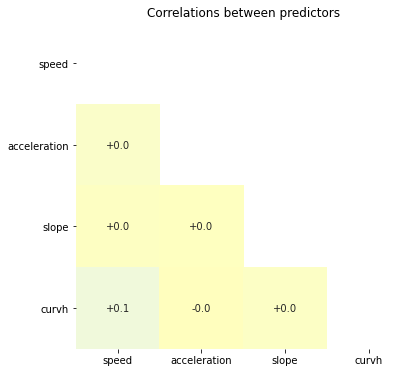

In [0]:
# Finding correlation between variables
plt.figure(figsize=(6,6))
Correlation = X.corr()

mask = np.zeros(Correlation.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

sns.heatmap(Correlation, cmap='RdYlBu', annot=True, fmt="+.1f", vmin = -1, vmax = 1, center = 0, cbar=False, mask=mask)

plt.title("Correlations between predictors")
plt.yticks(rotation=0)

There are no independent features with strong correlations. So we can use the four predictors for modelling the power traction.

#### Splitting data in training and test data

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=88)
print('Shape of X_train: ', X_train.shape, ' and y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape, ' and y_test: ', y_test.shape)

Shape of X_train:  (21370, 4)  and y_train:  (21370,)
Shape of X_test:  (9159, 4)  and y_test:  (9159,)


Now, we verify the training and test data follow similar distribution of the data.

In [0]:
# X_train
X_train.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
speed,21370.0,27.239655,22.635003,0.000000,0.000000,27.081836,45.623176,77.635873
acceleration,21370.0,-0.000925,0.419791,-1.345094,-0.215556,0.000000,0.045665,1.095747
slope,21370.0,-0.030941,9.506526,-26.000000,-1.900000,0.000000,1.700000,26.000000
curvh,21370.0,146.243458,426.908863,0.000000,0.000000,0.000000,0.000000,4760.240000


In [0]:
# X_test
X_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
speed,9159.0,27.757519,22.681944,0.00000,0.000000,27.657058,46.198397,77.585275
acceleration,9159.0,0.001924,0.416767,-1.33808,-0.203703,0.000000,0.049151,1.095747
slope,9159.0,-0.120286,9.564370,-26.00000,-1.900000,0.000000,1.700000,26.000000
curvh,9159.0,147.619523,428.940246,0.00000,0.000000,0.000000,0.000000,4760.240000


#### Scaling the data

Reasons behind performing normalization on input variables are:
1. Feature scaling improves convergence of steepest descent algorithms
2. Helps to avoid a situation when several variables dominate other variables in magnitude

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data

In [0]:
X_train_df = pd.DataFrame(X_train, columns=['speed', 'acceleration', 'slope', 'curvh'])
X_train_df['df_type'] = 'X_train'
X_train_df.head()

,speed,acceleration,slope,curvh,df_type
0,0.233497,-1.185784,0.350393,-0.342572,X_train
1,1.469082,0.479042,-0.343883,-0.342572,X_train
2,-1.203459,0.002203,0.003255,-0.342572,X_train
3,-0.115058,2.051973,-0.207132,-0.100032,X_train
4,-1.203459,0.002203,0.013774,-0.342572,X_train


In [0]:
X_test_df = pd.DataFrame(X_test, columns=['speed', 'acceleration', 'slope', 'curvh'])
X_test_df['df_type'] = 'X_test'
X_test_df.head()

,speed,acceleration,slope,curvh,df_type
0,1.274698,0.002203,0.329354,-0.342572,X_test
1,1.340611,-0.734007,2.349067,-0.342572,X_test
2,-0.004458,-1.336420,2.633089,0.412268,X_test
3,-0.748492,-1.420092,0.003255,-0.342572,X_test
4,-0.545725,-1.486991,0.192603,-0.342572,X_test


[None, None]

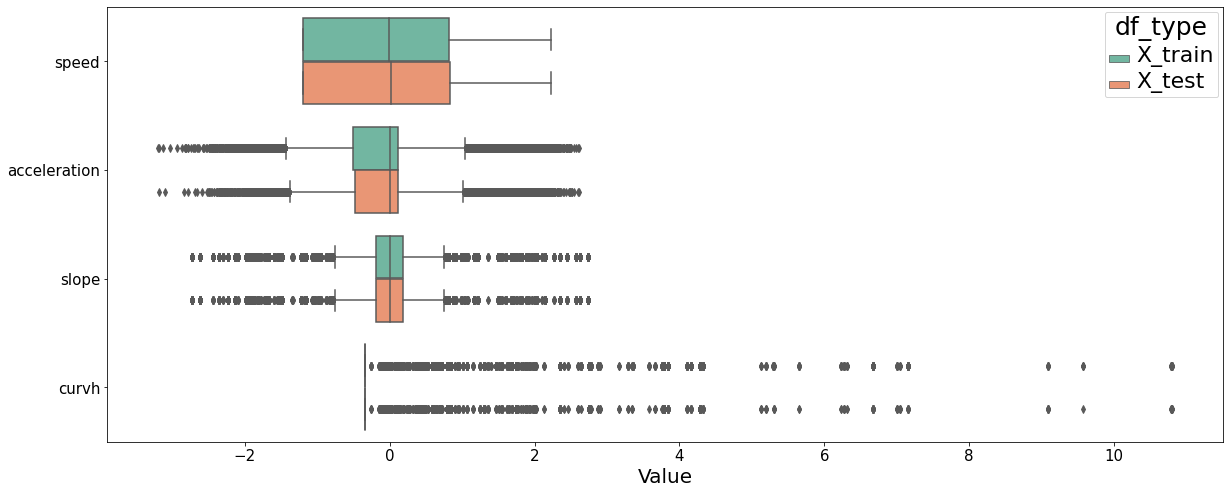

In [0]:
df3 = pd.concat([X_train_df, X_test_df], ignore_index=True)
df_long = pd.melt(df3, "df_type", var_name="", value_name="value")

plt.figure(figsize=(20,8))
ax = sns.boxplot(y="", hue="df_type", x="value", data=df_long, palette="Set2", orient='h')
plt.tick_params(labelsize=15)
plt.xlabel('Value', fontsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize='22')
plt.setp(ax.get_legend().get_title(), fontsize='25') 




As we can see, the distribution of both X_train and X_test are similar, so we can train the models using X_train and testing the models in X_test.

### Training different ML models Using speed, acceleration, slope and horizontal curvature as predictors

LR: R2_cv_results_train_score: 0.51, R2_train_score: 0.03, R2_test_score: -0.01, MAE_test: 258.99, rMSE_test: 50.28
Ridge: R2_cv_results_train_score: 0.51, R2_train_score: 0.03, R2_test_score: -0.01, MAE_test: 258.99, rMSE_test: 50.28
DT: R2_cv_results_train_score: 0.76, R2_train_score: 0.80, R2_test_score: 0.68, MAE_test: 137.23, rMSE_test: 25.70
RF: R2_cv_results_train_score: 0.79, R2_train_score: 0.78, R2_test_score: 0.70, MAE_test: 126.15, rMSE_test: 22.69
GB: R2_cv_results_train_score: 0.77, R2_train_score: 0.71, R2_test_score: 0.66, MAE_test: 139.96, rMSE_test: 24.76
NN: R2_cv_results_train_score: 0.75, R2_train_score: 0.67, R2_test_score: 0.65, MAE_test: 148.83, rMSE_test: 26.02


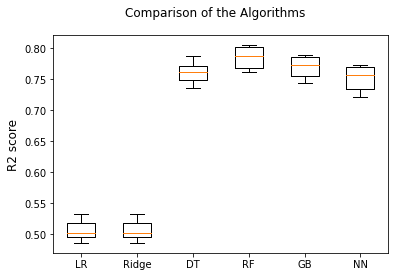

In [0]:
# Defining different models
models = []

models.append(('LR', LinearRegression()) )
models.append(('Ridge', Ridge()) )
models.append(('DT', DecisionTreeRegressor(min_samples_leaf=15)) )
models.append(('RF', RandomForestRegressor(min_samples_leaf=15)) )
models.append(('GB', GradientBoostingRegressor(min_samples_leaf=15)) )
models.append(('NN', MLPRegressor(early_stopping=True, max_iter=1000) ))


# Evaluating each model using as metrics: r2 and MAE because there are a lot of outliers in our dataset, for this reason we will no use MSE
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="r2")
    results.append(cv_results)
    names.append(name)
    model_result = model.fit(X_train,y_train)
    ypred_train = model_result.predict(X_train)
    ypred_test = model_result.predict(X_test)
    msg = "%s: R2_cv_results_train_score: %.2f, R2_train_score: %.2f, R2_test_score: %.2f, MAE_test: %.2f, rMSE_test: %.2f" % (
        name, cv_results.mean(), r2_score(ypred_train,y_train), r2_score(ypred_test,y_test), mean_absolute_error(ypred_test,y_test), 100*(mean_squared_error(ypred_test,y_test))/np.var(y_test)
    )
    print(msg)


# Comparing the models
fig = plt.figure()
fig.suptitle('Comparison of the Algorithms')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('R2 score', fontsize=12)
plt.show()

As we can see, the Random Forest model is the best in predicting the traction. However, Gradient Boosting, Decision Tree and Neural Network models have similar metrics than the achieved by the Random Forest model.

Thus, using the following features as predictors:

- speed
- acceleration
- slope
- curvh

We achieve the following results for each ML model:


| Model                  | R2_train     | R2_test     | MAE_test   |  rMSE_test [%] |
|------------------------|--------------|-------------|------------|----------------|
| Linear Regression      | 0.03        | -0.01       | 258.99     |  50.28         |
| Ridge Regression       | 0.03        | -0.01       | 258.99     |  50.28         |
| Decision Tree          | 0.80        | 0.68        | 137.23     |  25.70         |
| **Random Forest**      | **0.78**    | **0.70**    | **126.15** |  **22.69**       |
| Gradient Boosting      | 0.71        | 0.66        | 139.96     |  24.76         |
| Neural Network         | 0.67        | 0.65        | 148.83     |  26.02         |

# Improving Random Forest model using the four predictors

To improve the Random Forest model, we use the random search method, performing the hyperparameter tuning.

In [0]:
# Defining the model and parameters tu use the hyperparameter tuning
model = RandomForestRegressor(random_state=42, min_samples_leaf=15)

model_params = {
    'n_estimators': randint(4,100),
    'min_samples_split': randint(2,10)
     }

# Defining the grid search, using the cross-validation method

grid_search = RandomizedSearchCV(estimator=model, param_distributions=model_params, n_iter=100, n_jobs=-1, cv=10, scoring='neg_mean_squared_error', verbose=10, random_state=42)
grid_result = grid_search.fit(X_train, y_train)

best_estimator = grid_result.best_estimator_

ypred_train = best_estimator.predict(X_train)
ypred_test = best_estimator.predict(X_test)
R2_train_score = r2_score(ypred_train,y_train)
R2_test_score = r2_score(ypred_test,y_test)
MAE_test = mean_absolute_error(ypred_test,y_test)
rMSE_test = 100*(mean_squared_error(ypred_test,y_test))/np.var(y_test)

# Summarizing results
print("Best: %.2f, R2_train_score: %.2f, R2_test_score: %.2f, MAE_test: %.2f, rMSE_test: %.2f. Using %s" % (grid_result.best_score_, R2_train_score, R2_test_score, MAE_test, rMSE_test, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r." % (mean, stdev, param))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  2

Best: -62377.74, R2_train_score: 0.78, R2_test_score: 0.70, MAE_test: 126.22, rMSE_test: 22.65. Using {'min_samples_split': 5, 'n_estimators': 97}
-62391.253354 (3953.903106) with: {'min_samples_split': 8, 'n_estimators': 55}.
-62964.715486 (3980.809900) with: {'min_samples_split': 6, 'n_estimators': 18}.
-62396.284920 (3932.455724) with: {'min_samples_split': 4, 'n_estimators': 75}.
-62683.630022 (3932.892254) with: {'min_samples_split': 6, 'n_estimators': 24}.
-62400.537123 (3950.591792) with: {'min_samples_split': 8, 'n_estimators': 86}.
-62399.798284 (3947.679268) with: {'min_samples_split': 8, 'n_estimators': 78}.
-62390.971900 (3960.862994) with: {'min_samples_split': 4, 'n_estimators': 91}.
-62579.726965 (3914.106927) with: {'min_samples_split': 6, 'n_estimators': 27}.
-62633.048558 (3972.101882) with: {'min_samples_split': 4, 'n_estimators': 25}.
-64916.685165 (4062.513769) with: {'min_samples_split': 6, 'n_estimators': 5}.
-62543.475011 (3894.138416) with: {'min_samples_split'

# Watching the chosen Random Forest model

In [0]:
RF_params = RandomForestRegressor(min_samples_split=5, n_estimators=97, random_state=42, min_samples_leaf=15 )
RF = RF_params.fit(X_train,y_train)


ypred_train = RF.predict(X_train)
ypred_test = RF.predict(X_test)

print('R2_train is: ', round(r2_score(ypred_train,y_train), 2))
print('R2_test is: ', round(r2_score(ypred_test,y_test), 2))
print('Mean Absolute Error is: ', round(mean_absolute_error(ypred_test,y_test), 2))
print('Relative Mean Squared Error is: ', round(100*(mean_squared_error(ypred_test,y_test))/np.var(y_test), 2), '%')

R2_train is:  0.78
R2_test is:  0.7
Mean Absolute Error is:  126.22
Relative Mean Squared Error is:  22.65 %


In [0]:
def plot_learning_curve(estimator, X, y, cv=None, ylim=None):
    
    plt.figure()
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.ylabel('rMSE %', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14) 
    
    train_sizes, train_scores, validation_scores = model_selection.learning_curve(
        estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 50), scoring = 'neg_mean_squared_error')
    
    train_scores_mean = np.mean(-100*train_scores/(np.var(y)), axis = 1)
    validation_scores_mean = np.mean(-100*validation_scores/(np.var(y)), axis = 1)


    plt.plot(train_sizes, train_scores_mean, color="r", label = 'Training score')
    plt.plot(train_sizes, validation_scores_mean, color="g", label = 'Cross-validation score')

    plt.legend(loc="best")
    plt.ylim()
    
    return plt
    


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

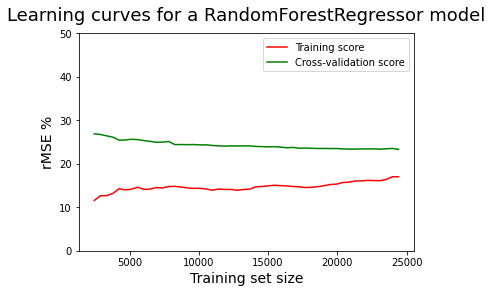

In [0]:
cv = model_selection.ShuffleSplit(n_splits = 50, test_size = 0.30, random_state = 42)
estimator = RF_params
plot_learning_curve(estimator, X, y, ylim=(0,50), cv=cv)

## Assessing the performance of the Random Forest model.

Now, we will analyse if we can improve again the random forest performing grid search modifying min_samples_split and n_estimators parameters.

In [0]:
# Analysing for n_estimators and max_depth
n_estimators=[]
min_samples_split=[]
rmse = []
for i in range(1,101):
    for j in range(2,11):
        RF_params = RandomForestRegressor(min_samples_split=j, n_estimators=i, random_state=42, min_samples_leaf=15 )
        RF = RF_params.fit(X_train,y_train)
        ypred_train = RF.predict(X_train)
        ypred_test = RF.predict(X_test)
    
        rmse.append(round(100*(mean_squared_error(ypred_test,y_test))/np.var(y_test), 2))
        n_estimators.append(i)
        min_samples_split.append(j)
        

tuning=pd.DataFrame(list(zip(n_estimators, min_samples_split, rmse)), columns=['n_estimators', 'min_samples_split', 'rmse'])
tuning.sort_values(by=['rmse'], inplace=True)

tuning.to_csv(base_dir + 'tuning.csv')
tuning.head(30)

,n_estimators,min_samples_split,rmse
270,31,2,22.57
268,30,9,22.57
269,30,10,22.57
271,31,3,22.57
272,31,4,22.57
273,31,5,22.57
274,31,6,22.57
275,31,7,22.57
276,31,8,22.57
267,30,8,22.57


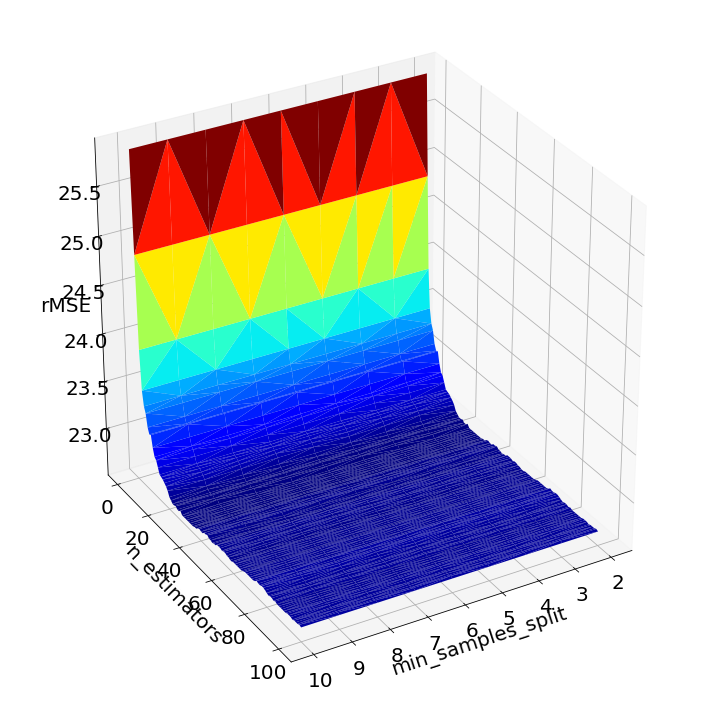

In [0]:

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

surf = ax.plot_trisurf(tuning['min_samples_split'], tuning['n_estimators'], tuning['rmse'], cmap=plt.cm.jet, linewidth=0)
#fig.colorbar(surf, aspect=5, )


ax.set_xlabel('min_samples_split', fontsize=20)
ax.set_ylabel('n_estimators', fontsize=20)
ax.set_zlabel('rMSE', fontsize=20)

ax.tick_params(labelsize=20)

# Rotate it
ax.view_init(30, 60)

fig.tight_layout()
plt.savefig(base_dir + 'fig_min_samples_split_n_estimators', quality=95, format="jpg")
plt.show()

In this figure we can realise there is no a contribution made bu min_samples_split, for this reason, we perform a grid search using only the n_estimators to analyse the performance of the model for training and test data.

In [0]:
# Grid search for n_estimators



n_estimators=[]
rmse_train = []
rmse_test = []


for i in tqdm(range(1,101)):

  model = RandomForestRegressor(n_estimators=i, random_state=42, min_samples_leaf=15)
  kfold = KFold(n_splits=10, random_state=42)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
  
  model_result = model.fit(X_train,y_train)
  ypred_train = model_result.predict(X_train)
  ypred_test = model_result.predict(X_test)
  rMSE_train = 100*(mean_squared_error(ypred_train,y_train))/np.var(y_train)
  rMSE_test = 100*(mean_squared_error(ypred_test,y_test))/np.var(y_test)

  rmse_train.append(rMSE_train)
  rmse_test.append(rMSE_test)
  n_estimators.append(i)



In [0]:

tuning_n_estimators_train_test=pd.DataFrame(list(zip(n_estimators, rmse_train, rmse_test)), columns=['n_estimators', 'rmse_train', 'rmse_test'])

tuning_n_estimators_train_test.to_csv(base_dir + 'tuning_n_estimators_train_test.csv')
tuning_n_estimators_train_test.head()

,n_estimators,rmse_train,rmse_test
0,1,20.943931,25.906707
1,2,18.984635,24.874361
2,3,18.242089,23.909568
3,4,17.926463,23.498577
4,5,17.742809,23.352089


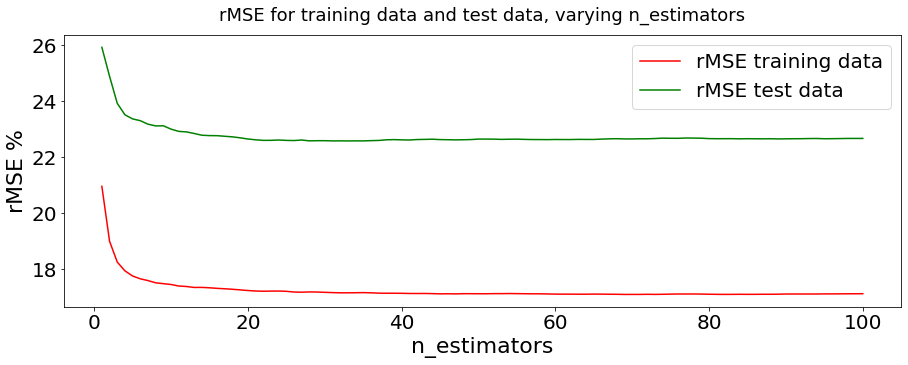

In [0]:

fig = plt.figure(figsize=(15,5))

plt.title('rMSE for training data and test data, varying n_estimators', fontsize = 18, y = 1.03)
plt.ylabel('rMSE %', fontsize = 22)
plt.xlabel('n_estimators', fontsize = 22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
    

plt.plot(n_estimators, rmse_train, color="r", label = 'rMSE training data')
plt.plot(n_estimators, rmse_test, color="g", label = 'rMSE test data')
plt.legend(loc="best",  fontsize=20)

plt.savefig(base_dir + 'fig_n_estimators', quality=95, format="jpg")
plt.show()

R2_train is:  0.78
R2_test is:  0.7
Mean Absolute Error is:  126.49
Relative Mean Squared Error is:  22.58 %


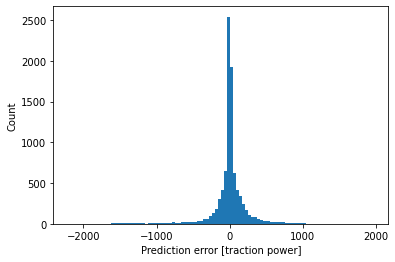

In [0]:
RF_params = RandomForestRegressor(min_samples_split=2, n_estimators=25, random_state=42, min_samples_leaf=15 )
RF = RF_params.fit(X_train,y_train)


ypred_train = RF.predict(X_train)
ypred_test = RF.predict(X_test)

print('R2_train is: ', round(r2_score(ypred_train,y_train), 2))
print('R2_test is: ', round(r2_score(ypred_test,y_test), 2))
print('Mean Absolute Error is: ', round(mean_absolute_error(ypred_test,y_test), 2))
print('Relative Mean Squared Error is: ', round(100*(mean_squared_error(ypred_test,y_test))/np.var(y_test), 2), '%')

# Analysing the distribution of the errors
error = ypred_test - y_test
plt.hist(error, bins=100)
plt.xlabel('Prediction error [traction power]')
_ = plt.ylabel('Count')

The distribution of errors is quite gaussian, which can be considered as a good fitting of the model.

In [92]:
# Importance of each feature
RF_params.feature_importances_

array([0.29135035, 0.65678281, 0.04728372, 0.00458313])

## Saving the model

In [0]:
# Random Forest Model
RF_model_complete = 'RF_model_complete.sav'
pickle.dump(RF, open(base_dir + RF_model_complete, 'wb')) # Just save the model once